### Student Name: Begum Fatima Zohra
### UTA ID: 1001880881

### Program logic: The entire homework is divided into 5 parts.
### 1. Firstly, we scrape the Yahoo Finance commodities website to get all the commodity name and corresponding price in a commodities.csv file. Then we will convert the csv into allCommodity.txt text file that has all commodity details.
### 2. Secondly, we will use regex to find Crude Oil, Gold and Silver from allCommodity.txt and save it in our target text file commodity_prices.txt
### 3. Thirdly, we will upadate our previous csv with what is in our commodity_prices.txt data
### 4. Next, we use create sqlite3 CommodityDatabase and CommodityTable. And,we will insert the value present in commodities.csv to the  CommodityTable
### 5. Lastly, we will print the table rows. Also, we will use our terminal to confirm the table column details/types

### 
### Total files you will see in the directory as this python file: 4
### 1. commodities.csv --> Primary csv file used to create both text and sqlite files.
### 2. allCommodity.txt --> Primary text file with all commodity data used to create target text file
### 3. commodity_prices.txt --> Target file with Crude Oil, Gold and Silver ticker and price
### 4. CommodityDatabase.db --> It contains CommodityTable with columns Ticker as TEXT, Price as REAL. It has the same data as the commodity_prices.txt

#### 






### Part 1: Program to scrape all the market commodities. Here all the data under Ticker and Price as header is save in commodities.csv file and subsequently in allCommodity.txt file in the same directory as this python file.
### ***NOTE: Part 2 will create out target text file

In [1]:

#Can add items like Top Mutual Funds, Currencies, Cryptocurrencies etc to extract different categorical data
markets = ['commodities'] # append with the base url https://www.finance.yahoo.com

import requests #To query the web page
from bs4 import BeautifulSoup #to read/parse HTML data
url = 'https://www.finance.yahoo.com' # primary URL 

#-------------Function used to scrape the web page and save the result in CSV format---------------
def scrape_tickers(market, path=None): 
    if path is None:
        path = market+'.csv' #creating a CSV. Later we will use it to get .txt and sqlite3 .db files
    market_doc = get_page(market) #The tickers market of Yahoo Finance website is queried and a document is generated
    tickers = get_commodity_tickers(market_doc)
    write_csv(tickers, path) #writing into the CSV
    return path


#---------------Function to verify the Yahoo Finance commodities URL--------------------------
def get_page(market):
    tickers_url = 'https://www.finance.yahoo.com/'+market #URL = https://finance.yahoo.com/commodities
    response = requests.get(tickers_url)
    if response.status_code != 200: #checking if the URL giving any response or not
        print('Status code: ', response.status_code)
        raise Exception('Failed to fetch web page '+ tickers_url)
    doc = BeautifulSoup(response.text)
    return doc

#----------------Function to find the all the tickers listed on the web page---------------------------
def get_commodity_tickers(doc):
    ticker_tags = doc.find_all('tr', class_="simpTblRow") #identify the 'tr' tag in the HTML code that has class"simpTblRow"
    tickers = [scrape_parse_ticker(tag) for tag in ticker_tags] # loop through all the tickers using scrape_parse_ticker function to Ticker and Price
    return tickers

#----------------Function to get the required informations associated with each commodity---------
def scrape_parse_ticker(ticker__html_tag):
    ticker_td_tags = ticker__html_tag.find_all('td') #get all 'td' tagged HTML code inside 'tr' using find_all and to locate the information
    name = ticker_td_tags[1].text #get the ticker name
    price = ticker_td_tags[2].text #get the ticker price
    
    #return the result in key-value pair to the function get_commodity_tickers()
    return { 
        'Ticker': name,     
        'Price ': price,   
    }

#------------------Function to write the scraped information into CSV-----------------------------
def write_csv(items, path):
    with open(path, 'w') as f:
        if len(items) == 0: 
            return
        
       
        headers = list(items[0].keys())
        #print(headers)
        f.write(','.join(headers) + '\n') # writing the headers in the first line
        
        # Write one item per line
        for item in items:
            values = []
            for header in headers:
                values.append(str(item.get(header, "")))
                values[1:] = [w.replace(',', '') for w in values[1:]] #replacing the commas in price with ""
                #print(values)
            f.write(','.join(values) + "\n") #writing the commodity names and prices to the csv file

#------------------------program starts here-------------------------------------------------------
for market in markets: 
    scrape_tickers(market, path=None)
    
    
#--------------Converting csv to text-------------   
import csv #to work with csv

csv_file = 'commodities.csv' #input csv file containing all the commodities and their prices
txt_file = 'allCommodity.txt' #output text file containing all the commodities and their prices

with open(txt_file, "w") as output_file:
    with open(csv_file, "r") as input_file:
        [ output_file.write(','.join(row)+'\n') for row in csv.reader(input_file)]
    output_file.close()
    


### Part 2: Use regex to find Ticker and Price that matches with Crude Oil, Gold and Silver inside allCommodity.txt that we created in Part 1. Save those data in our target text commodity_prices.txt and display the inserted  lines too.
### ***NOTE: Target file commodity_prices.txt is created in the same directory as this python file

In [2]:
#import regex module
import re

# defining object file1 to open allCommodity.txt file in read mode
file1 = open('allCommodity.txt','r')

# defining object file2 to open commodity_prices.txt file in write mode
file2 = open('commodity_prices.txt','w') # FINAL TEXT FILE CONTAINING TICKER AND PRICES OF SILVER, CRUDE OIL AND GOLD

# reading each line from original text file
for line in file1.readlines():

#finding all lines that begin with "Ticker","Gold", "Silver", "Crude Oil"
    a = re.findall("^Ticker", line)
    x = re.findall("^Gold", line) 
    y = re.findall("^Silver", line)
    z = re.findall("^Crude Oil", line)
    
    if a or x or y or z:
# printing the matched lines        
        print(line)
# storing the matched lines
        file2.write(line)

# closing and saving the files
file1.close()
file2.close()



Ticker,Price 

Gold,1896.90

Silver,22.74

Crude Oil,104.11



### Part 3: Updating our commodities.csv with the same data that our target text file commodity_prices.txt contains.
### ***NOTE: The reason we are updating the csv file because we need it to create sqlite3 database and table and populate the table with our target data.

In [3]:
## importing pandas library
import pandas as pd

# reading given text file and creating dataframe
dataframe = pd.read_csv("commodity_prices.txt")

# adding column headings
dataframe.columns = ['Ticker', 'Price']

# store dataframe into csv file
dataframe.to_csv('commodities.csv',index = None)
print("Displaying CSV data in form of dataframe")
print(dataframe) #printing the dataframe 


Displaying CSV data in form of dataframe
      Ticker    Price
0       Gold  1896.90
1     Silver    22.74
2  Crude Oil   104.11


### Part 4: Gathering information from commodities.csv that are under column header Ticker and Price and print them for confirmation. 
###           Connecting to sqlite3 and creating the CommodityDatabase.db. 
###           To ensure every execution of the program creates a new CommodityTable, we drop the table if it exists and create it anew. 
###          Then, we insert the csv information into the table.
###         Lastly, we display the columns and table data.

In [4]:
import csv
import sqlite3


try:

    # Import csv and extract data
    with open('commodities.csv', 'r') as fin:
        dr = csv.DictReader(fin)
        info = [(i['Ticker'], i['Price']) for i in dr]
        print("Records from CSV are: ")
        print(info)

    # Connecting to SQLite
    sqliteConnection = sqlite3.connect('CommodityDatabase.db')
    cursor = sqliteConnection.cursor()
    print("Database created and Successfully Connected to SQLite") 
    
    # Create CommodityTable table    
    cursor.execute('DROP TABLE IF EXISTS CommodityTable')
    cursor.execute('create table CommodityTable(Ticker text, Price real);')

    # Inserting data into CommodityTable table
    cursor.executemany("insert into CommodityTable (Ticker, Price) VALUES (?, ?);", info)

    # Show CommodityTable table
    print('\n\n\nColumns in CommodityTable table:')
    data=cursor.execute('select * from CommodityTable;')
    for column in data.description:
        print(column[0])
    
    # Display CommodityTable data
    print('\n\n\nData in CommodityTable table:')
    data=cursor.execute('''SELECT * FROM CommodityTable''')
    for row in data:
        print(row)


    # Commit the database work and close the connection
    sqliteConnection.commit()
    cursor.close()

except sqlite3.Error as error:
    print('Error occured : ', error)

finally:
    if sqliteConnection:
        sqliteConnection.close()
        print('SQLite Connection closed')

Records from CSV are: 
[('Gold', '1896.9'), ('Silver', '22.74'), ('Crude Oil', '104.11')]
Database created and Successfully Connected to SQLite



Columns in CommodityTable table:
Ticker
Price



Data in CommodityTable table:
('Gold', 1896.9)
('Silver', 22.74)
('Crude Oil', 104.11)
SQLite Connection closed


### Part 5: Displaying column information of CommodityTable using terminal to confirm that our column types match with what is asked in the homework question

### 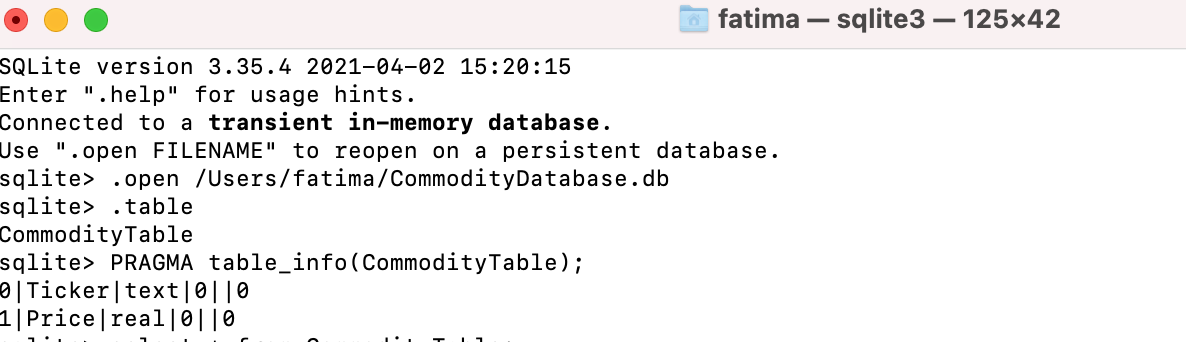